# Opening

In [1]:
from __future__ import print_function
import torch

In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[                        0.0000,                        -0.0000,
         -249195966813433254379520.0000],
        [                        2.0005,                         0.0000,
                                -0.0000],
        [                        0.0000,                         0.0000,
                                 0.0000],
        [                        0.0000,                         0.0000,
                                 0.0000],
        [                        0.0000,                         0.0000,
                                 0.0000]])


In [4]:
x = torch.rand(5,3)

In [5]:
print(x)

tensor([[0.2303, 0.7786, 0.7321],
        [0.4239, 0.2761, 0.9021],
        [0.0528, 0.8994, 0.4374],
        [0.2099, 0.0253, 0.5952],
        [0.0065, 0.1487, 0.3326]])


In [7]:
x = torch.zeros(5,3, dtype=torch.long)

In [8]:
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [9]:
x = torch.tensor([5.5,3])
print(x)

tensor([5.5000, 3.0000])


In [11]:
x = x.new_ones(5,3, dtype = torch.double)
print(x)
x = torch.rand_like(x, dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[0.9643, 0.7138, 0.6177],
        [0.9281, 0.5614, 0.8705],
        [0.8815, 0.4687, 0.2797],
        [0.6133, 0.5000, 0.0949],
        [0.8614, 0.5821, 0.3370]])


In [12]:
print(x.size())

torch.Size([5, 3])


In [13]:
y = torch.rand(5,3)
print(x+y)

tensor([[1.2487, 1.4859, 1.2247],
        [0.9970, 0.8132, 1.2201],
        [1.3456, 1.2238, 0.5659],
        [0.9738, 1.4440, 1.0573],
        [1.4095, 0.8765, 0.6657]])


In [14]:
print(torch.add(x,y))

tensor([[1.2487, 1.4859, 1.2247],
        [0.9970, 0.8132, 1.2201],
        [1.3456, 1.2238, 0.5659],
        [0.9738, 1.4440, 1.0573],
        [1.4095, 0.8765, 0.6657]])


In [16]:
result = torch.empty(5,3)
torch.add(x,y, out=result)
print(result)

tensor([[1.2487, 1.4859, 1.2247],
        [0.9970, 0.8132, 1.2201],
        [1.3456, 1.2238, 0.5659],
        [0.9738, 1.4440, 1.0573],
        [1.4095, 0.8765, 0.6657]])


In [18]:
y.add_(x)
print(y)

tensor([[2.2130, 2.1997, 1.8424],
        [1.9251, 1.3746, 2.0906],
        [2.2271, 1.6926, 0.8456],
        [1.5870, 1.9440, 1.1522],
        [2.2709, 1.4586, 1.0028]])


In [21]:
x

tensor([[0.9643, 0.7138, 0.6177],
        [0.9281, 0.5614, 0.8705],
        [0.8815, 0.4687, 0.2797],
        [0.6133, 0.5000, 0.0949],
        [0.8614, 0.5821, 0.3370]])

In [23]:
print(x[:,1])

tensor([0.7138, 0.5614, 0.4687, 0.5000, 0.5821])


In [24]:
x = torch.rand(4,4)
y = x.view(16)
z = x.view(-1,8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [25]:
x = torch.rand(1)

In [27]:
print(x)
x.item()

tensor([0.0680])


0.06796497106552124

In [30]:
a = torch.ones(5)

In [31]:
print(a)

tensor([1., 1., 1., 1., 1.])


In [32]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [35]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [36]:
import numpy as np

In [38]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a,1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


#### I don't have CUDA....

In [39]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))  

____

# Deep learning

### 1. Define the Network

In [42]:
import torch.nn as nn
import torch.nn.functional as F


In [43]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6,5)
        self.conv2 = nn.Conv2d(6, 16,5)

        #16 channel , 5*5 filter
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size :
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [44]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) #conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [46]:
#LeNet 32*32
input = torch.randn(1,1,32,32)
out = net(input)
print(out)

tensor([[ 0.0928,  0.0527, -0.0074,  0.0780,  0.0347, -0.0413,  0.1078, -0.0448,
         -0.0229, -0.0615]], grad_fn=<ThAddmmBackward>)


In [47]:
net.zero_grad()
out.backward(torch.randn(1,10))

### 2. Loss function

In [55]:
output = net(input)
target = torch.randn(10)
target = target.view(1,-1)
criterion = nn.MSELoss()

loss = critetrion(output, target)
print(loss)


tensor(0.9877, grad_fn=<MseLossBackward>)


In [56]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### Backpropagation

In [57]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0150,  0.0081,  0.0153,  0.0045, -0.0077, -0.0038])


### 3. Update the weights

In [58]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [59]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

# Training a classifier

In [62]:
!pip install torchvision

    100% |████████████████████████████████| 61kB 426kB/s ta 0:00:01


In [63]:
import torchvision
import torchvision.transforms as transforms

In [65]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


 deer plane horse   car


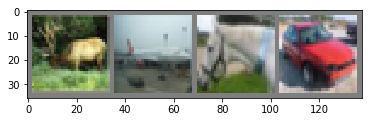

In [88]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Defining CNN

In [95]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net =Net()

### Define Loss function & optimizer

In [96]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the Network

In [97]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % 
                 (epoch +1, i+1, running_loss/2000))
            running_loss = 0.0
print('Finished Training')

# for epoch in range(2):  # loop over the dataset multiple times

#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         # get the inputs
#         inputs, labels = data

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         if i % 2000 == 1999:    # print every 2000 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0

# print('Finished Training')

[1,  2000] loss: 2.174
[1,  4000] loss: 1.829
[1,  6000] loss: 1.672
[1,  8000] loss: 1.578
[1, 10000] loss: 1.514
[1, 12000] loss: 1.493
[2,  2000] loss: 1.428
[2,  4000] loss: 1.371
[2,  6000] loss: 1.367
[2,  8000] loss: 1.374
[2, 10000] loss: 1.323
[2, 12000] loss: 1.324
Finished Training


GroundTruth:   cat  ship  ship plane


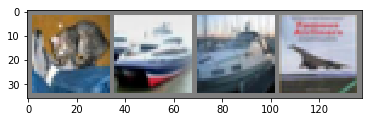

In [99]:
dataiter = iter(testloader)
images,labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth:', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [100]:
outputs = net(images)

In [101]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [102]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100* correct /total))


Accuracy of the network on the 10000 test images: 54 %


In [106]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted ==labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
    classes[i], 100 * class_correct[i]/b
    class_total[i]))

# class_correct = list(0. for i in range(10))
# class_total = list(0. for i in range(10))
# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         outputs = net(images)
#         _, predicted = torch.max(outputs, 1)
#         c = (predicted == labels).squeeze()
#         for i in range(4):
#             label = labels[i]
#             class_correct[label] += c[i].item()
#             class_total[label] += 1


# for i in range(10):
#     print('Accuracy of %5s : %2d %%' % (
#         classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 54 %
Accuracy of   car : 71 %
Accuracy of  bird : 41 %
Accuracy of   cat : 43 %
Accuracy of  deer : 48 %
Accuracy of   dog : 49 %
Accuracy of  frog : 47 %
Accuracy of horse : 55 %
Accuracy of  ship : 75 %
Accuracy of truck : 53 %


In [107]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cpu
